### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset and understanding what information each column is giving.

In [2]:
df = pd.read_csv('heart_study.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


male : whether patient is male or not (Nominal)

age : age of the patient (Continuous)

education: level of education completed (Nominal)

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

### Finding the number of null values in each column and deciding whether you can drop them or not.
If you cannot drop them, use an appropriate method to deal with them.

In [3]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
# df.drop(['education'], axis=1,inplace=True)                                     #irrelevant column to our prediction
df['glucose'].fillna(value=df['glucose'].mean(),inplace=True)
df['cigsPerDay'].fillna(value=df['cigsPerDay'].mean(),inplace=True)
df['BPMeds'].fillna(value=df['BPMeds'].mode()[0],inplace=True)
df['totChol'].fillna(value=df['totChol'].mean(),inplace=True)
df['BMI'].fillna(value=df['BMI'].mean(),inplace=True)
df['heartRate'].fillna(value=df['heartRate'].mean(),inplace=True)

In [5]:
# df.dropna(axis=0,inplace=True)

In [6]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029245,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


<Axes: xlabel='TenYearCHD', ylabel='count'>

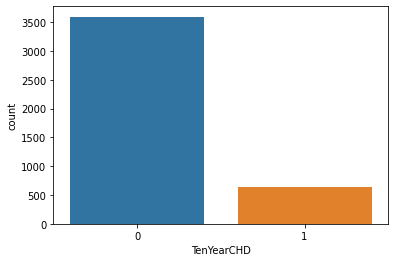

In [8]:
sns.countplot(x='TenYearCHD', data=df)

We can observe that there is severe class imbalance. We will see how the model works on this dataset and then take further action.

### Spliting the dataset into train and test and fit the training dataset in the Logistic Regression.

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=5)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Why does running the above code give an error? What could be the possible reason behind such an error?

1. Insufficient number of iterations
2. Scale of input features
3. Try a different solver ('liblinear', 'sag', 'saga'). Different solver has different convergence characteristics
4. Feature Selection 
https://www.javatpoint.com/feature-selection-techniques-in-machine-learning


In [10]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

age                0.030255
diaBP              0.019236
sysBP              0.014543
prevalentHyp       0.012683
totChol            0.010279
glucose            0.007417
currentSmoker      0.005903
BPMeds             0.005887
diabetes           0.004767
prevalentStroke    0.004713
BMI                0.004359
cigsPerDay         0.001530
heartRate          0.001416
male               0.000000
dtype: float64

In [11]:
df=df[['age','sysBP','diaBP','prevalentHyp','totChol','TenYearCHD']]
df.head()

,age,sysBP,diaBP,prevalentHyp,totChol,TenYearCHD
0,39,106.0,70.0,0,195.0,0
1,46,121.0,81.0,0,250.0,0
2,48,127.5,80.0,0,245.0,0
3,61,150.0,95.0,1,225.0,1
4,46,130.0,84.0,0,285.0,0


In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=5)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

<Axes: >

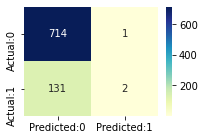

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy: ",accuracy_score(y_test,y_pred))            # accuracy: (tp + tn) / (p + n)
print("Precision: ",precision_score(y_test,y_pred))          # precision: tp / (tp + fp)
print("Recall: ",recall_score(y_test,y_pred))                # recall: tp / (tp + fn)

Accuracy:  0.8443396226415094
Precision:  0.6666666666666666
Recall:  0.015037593984962405


In [15]:
y_trainpred = logreg.predict(x_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train,y_trainpred))

Training Accuracy:  0.8508254716981132


The severe class imbalance has made our model biased towards the prediction "0" i.e., no risk of CHD for ten years.

### Weighted Logistic Regression

<Axes: >

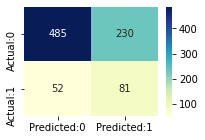

In [16]:
# class_weights = {0:20,1:80}
class_weights = dict(zip([1, 0], [(len(y_train) - sum(y_train)) / len(y_train), sum(y_train) / len(y_train)]))

# Initialize the logistic regression model with class weights
model = LogisticRegression(class_weight=class_weights)

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy: ",accuracy_score(y_test,y_pred))           # accuracy: (tp + tn) / (p + n)
print("Precision: ",precision_score(y_test,y_pred))         # precision: tp / (tp + fp)
print("Recall: ",recall_score(y_test,y_pred))               # recall: tp / (tp + fn)

Accuracy:  0.6674528301886793
Precision:  0.2604501607717042
Recall:  0.6090225563909775


In [18]:
y_trainpred = model.predict(x_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train,y_trainpred))

Training Accuracy:  0.6494693396226415


### Re-sampling

<Axes: xlabel='TenYearCHD', ylabel='count'>

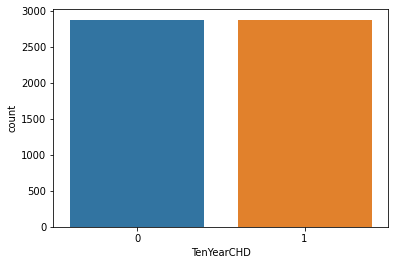

In [19]:
from imblearn.over_sampling import RandomOverSampler
# Apply Random Over-sampling to balance the dataset
ros = RandomOverSampler(random_state=5)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)
sns.countplot(x=y_resampled, data=x_resampled)

In [20]:
# Initialize the logistic regression model
model = LogisticRegression()
# Fit the model on the resampled data
model.fit(x_resampled, y_resampled)
# Make predictions on the test data
y_pred = model.predict(x_test)

<Axes: >

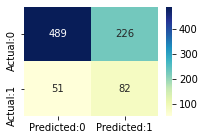

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Testing Accuracy: ",accuracy_score(y_test,y_pred))           # accuracy: (tp + tn) / (p + n)
print("Testing Precision: ",precision_score(y_test,y_pred))          # precision: tp / (tp + fp)
print("Testing Recall: ",recall_score(y_test,y_pred))                     # recall: tp / (tp + fn)

Testing Accuracy:  0.6733490566037735
Testing Precision:  0.2662337662337662
Testing Recall:  0.6165413533834586


In [23]:
y_trainpred = model.predict(x_train)
from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train,y_trainpred))

Training Accuracy:  0.6506485849056604
